**Step 1: Upload File**

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving customer_booking.csv to customer_booking.csv


**Step 2: Load Data**

In [5]:
import pandas as pd

# Load the uploaded CSV into a DataFrame
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Show first few rows
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


 **Step 3: Preprocess Data**

In [6]:
 # Map flight_day to numbers
flight_day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(flight_day_mapping)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df,
    columns=["sales_channel", "trip_type", "route", "booking_origin"],
    drop_first=True
)

# Separate features and target
X = df_encoded.drop("booking_complete", axis=1)
y = df_encoded["booking_complete"]

**Step 4: Split Data and Train Model**




In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Step 5: Evaluate Model**

Accuracy: 0.8524
ROC AUC Score: 0.7886945263925896

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.14      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000



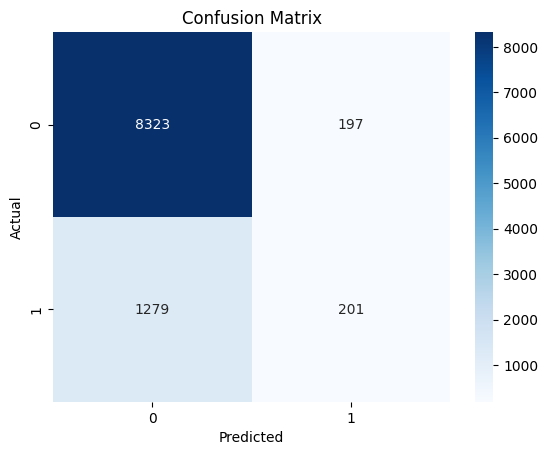

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Accuracy and ROC AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Step 6: Feature Importance Visualization**

<ipython-input-9-bf13984c8b27>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")


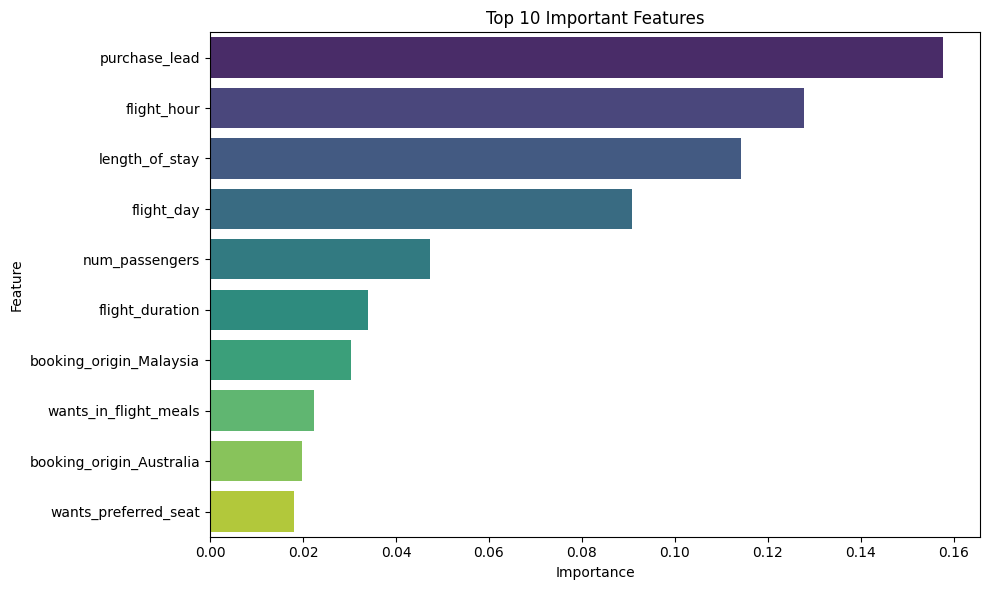

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
plt.title("Top 10 Important Features")
plt.tight_layout()

# Save image for your PowerPoint
plt.savefig("feature_importance.png")
plt.show()

In [10]:
from google.colab import files

# Download feature importance image
files.download("feature_importance.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 9.9 MB/s eta 0:00:00


<ipython-input-12-ac16efdd16ed>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")


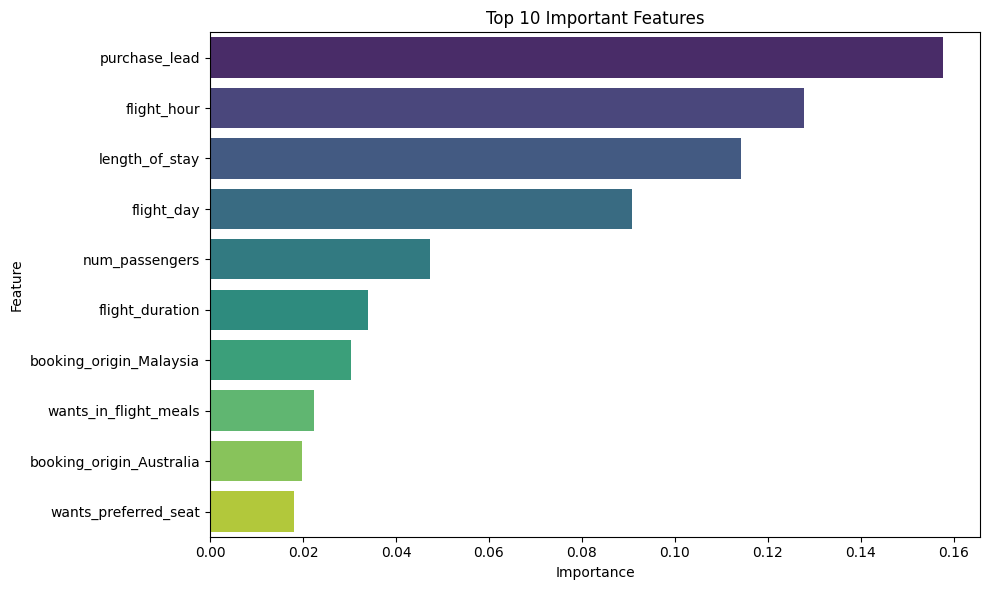

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame and sort
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
plt.title("Top 10 Important Features")
plt.tight_layout()

# Save image for PowerPoint
plt.savefig("feature_importance.png")
plt.show()